In [2]:
import tensorflow as tf
from tensorflow import keras
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd 

In [4]:
SD=pickle.load(open("SD.pickle", "rb"))
L=pickle.load(open("L.pickle", "rb"))
from sklearn.model_selection import train_test_split
SD_train, SD_test, L_train, L_test = train_test_split(
    SD, L, test_size=0.2, random_state=0)

In [3]:
num_features = 32
num_labels = 2
batch_size = 2
epochs = 20
width, height = 50, 50

In [4]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1),))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#model.add(tf.keras.layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))

#model.add(tf.keras.layers.Conv2D(num_features*2, kernel_size=(3, 3), activation='relu', padding='same'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#model.add(tf.keras.layers.Conv2D(num_features*2, kernel_size=(3, 3), activation='relu', padding='same'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#model.add(tf.keras.layers.Dropout(0.4))



model.add(tf.keras.layers.Flatten())

#model.add(tf.keras.layers.Dense(2*2*num_features, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2*num_features, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.0001)

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(keras.optimizers.Adam(),
             loss=keras.losses.BinaryCrossentropy(),
             metrics=['accuracy']
             )
model.summary()
history=model.fit(SD_train, L_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[reduce_lr]
          )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1179712   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

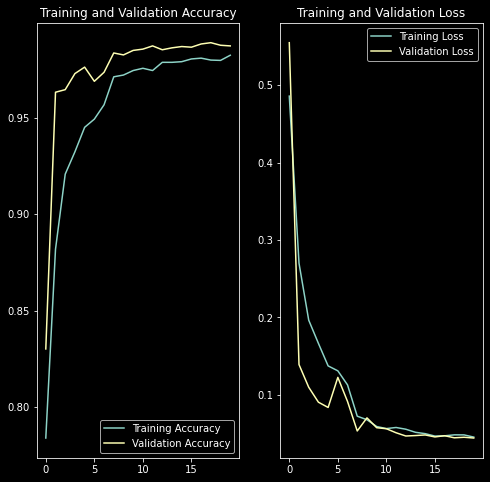

In [7]:
plt.style.use('dark_background')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
results = model.evaluate(SD_test, L_test, batch_size=8)

468/468 [==============================] - 2s 5ms/step - loss: 0.0480 - accuracy: 0.9885
